# Monte Carlo Glauber Model 

---

Nuclei are composed of an ensemble of tightly bound protons and neutrons, which are in turn, tightly bound ensembles of quarks and gluons.  If two nuclei are made to collide at very high energies, such as at the CERN Large Hadron Collider (LHC), they can vaporize into quarks and gluons and form a Quark Gluon Plasma.

The left-hand figure below shows two Au (gold) nuclei just after a grazing collision in which only a fraction of the 197 protons and neutrons (collectively called *nucleons*) actually interact.  The right-hand side of the figure shows the substructure of the nucleons, which are composed of three valence quarks and the gluons that hold them together.



Only some of the nucleons interact when the nuclei collide unless they hit perfectly head-on.  We define the offset of the two nuclei by an impact parameter, $b$, defined as the distance between the centers of the two nuclei as seen in a beam's-eye view.  This figure illustrates the two-dimensional geometric overlap region shaded green.



The distribution of nucleons within a nucleus is not uniform.  The radial distribution for spherical nuclei is generally described by the Woods-Saxon density profile, given by

$$
\rho(r) = \frac{\rho_0 (1 + wr^2/R^2)}{1 + \exp((r-R)/a)}
$$

where $R$ is the average radius of the nucleus, and $a$, $w$ are density parameters.  These parameters come from empirical observations of electron scattering off various nuclei.  The three parameter Woods-Saxon distribution describes a central nucleon density suppression to minimize the Coulombic potential, a maximum nucleon density radius, and then a fall off to zero density at infinite radius.  Typical values for an assortment of nuclei is given in the Table.

<table><tr><th>Nucleus</th><th>A</th><th>R (fm)</th><th>a (fm$^{-1}$)</th><th>w</th></tr>
<tr><td>C</td><td>12</td><td>2.47</td><td>0</td><td>0</td></tr>
<tr><td>O</td><td>16</td><td>2.608</td><td>0.513</td><td>-0.051</td></tr>
<tr><td>Al</td><td>27</td><td>3.07</td><td>0.519</td><td>0</td></tr>
<tr><td>S</td><td>32</td><td>3.458</td><td>0.61</td><td>0</td></tr>
<tr><td>Ca</td><td>40</td><td>3.76</td><td>0.586</td><td>-0.161</td></tr>
<tr><td>Ni</td><td>58</td><td>4.309</td><td>0.516</td><td>-0.1308</td></tr>
<tr><td>Cu</td><td>63</td><td>4.2</td><td>0.596</td><td>0</td></tr>
<tr><td>W</td><td>186</td><td>6.51</td><td>0.535</td><td>0</td></tr>
<tr><td>Au</td><td>197</td><td>6.38</td><td>0.535</td><td>0</td></tr>
<tr><td>Pb</td><td>208</td><td>6.68</td><td>0.546</td><td>0</td></tr>
<tr><td>U</td><td>238</td><td>6.68</td><td>0.6</td><td>0</td></tr>
</table>

<table><tr><th>Nucleus</th><th>A</th><th>R (fm)</th><th>a (fm$^{-1}$)</th><th>w</th></tr>
<tr><td>Pb</td><td>208</td><td>6.68</td><td>0.546</td><td>0</td></tr>
</table>

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as p

Populating the interactive namespace from numpy and matplotlib


**(a)** Plot the Woods-Saxon distribution $\rho(r)$ and $r^2\rho(r)$ for gold from $r$ = 0 fm to $r$ = 18 fm.

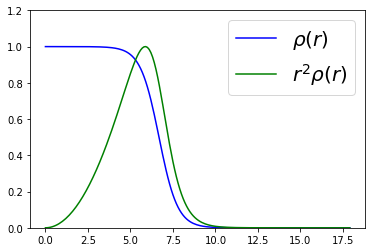

In [3]:
rho = lambda r, w, a, R, A: (1+w*r**2/R**2)/(1+np.exp((r-R)/a))

r = np.arange(0.,18.,0.1)
w = 0.
a = 0.546
R = 6.68
A = 208

fr = r**2*rho(r,w,a,R,A)
plt.plot(r,rho(r,w,a,R,A),'b-',label=r'$\rho(r)$')
#Scale it so it fits on the same plot.  It's the shape that matters
plt.plot(r,fr/fr.max(),'g-',label=r'$r^2\rho(r)$')

plt.ylim(0.,1.2)
plt.legend(loc="best",fontsize=20)
plt.show()

**(b)** Let’s create a realistic distribution for two lead ions, A, and B. 

* First, distribute 208 nucleons for each nucleus using the Woods-Saxon distribution multiplied by the spherical coordinate weighting factor, $r^2$.  Use the `distribute1d` function from the tour to sample $r$ values numerically.  

* Then, use uniform sampling of a number $u$ from [0,1) scaled by $2\pi$ to obtain the azimuthal angle $\phi$ = 2$\pi u$ 

* Followed by uniform sampling of another number $v$ = [0,1), transformed to $\theta = \cos^{-1}(2v - 1)$ to obtain the polar angle $\theta$.  

(Note that this is the physics definition of azimuthal and polar angles, not the math definition.)


The reason for these transformations is that the volume element $dV = r^2\sin\theta dr d\theta d\phi$ has both radial and polar angle dependence.  If you do not sample in this way, your results will be bunched up at the poles and toward the outer edges of the sphere.

In [4]:
from scipy.integrate import trapz,cumtrapz
def distribute1D(x,prob,N):
    """takes any distribution which is directly proportional 
    to the number of particles, and returns data that is 
    statistically the same as the input data."""
    CDF = cumtrapz(prob)/np.sum(prob)
    xsamples = np.zeros(N,float)
    for i in range(0,N):
        r = np.random.ranf()
        xsamples[i] = x[CDF.searchsorted(r)]
    return xsamples

In [5]:
A = 208
nucA = np.zeros(shape((A,A,A)))
rA = distribute1D(r,r**2*rho(r,w,a,R,A),A)
phiA = 2*np.pi*np.random.random_sample(A)
thA = np.arccos(2*np.random.random_sample(A)-1.)

In [6]:
B = 208
nucB = np.zeros(shape((B,B,B)))
rB = distribute1D(r,r**2*rho(r,w,a,R,B),B)
phiB = 2*np.pi*np.random.random_sample(B)
thB = np.arccos(2*np.random.random_sample(B)-1.)

**(c)** Once you have the spherical coordinates for each of the nucleons in each nucleus, convert to cartesian coordinates.   In nuclear collisions, the beam axis along which the particles travel/collide is the $z$ axis.  The polar angle $\theta$ is measured *up* from the positive-$z$ axis and the azimuthal angle $\phi$ is measured *up* from the positive $x$-axis.

Plot the nuclei in 2d for two different planar projections: the side view ($x$-$z$) and the beam's eye view ($x$-$y$) side-by-side.  

Let the nucleons have radius of 1 fm, make the nucleons from each nucleus a different color, and displace them by a randomly chosen impact parameter $b$ between 0 and 18 fm.  For example, shift ion A by $b/2$ to the left along the $x$-axis and B by $b/2$ to the right along the x-axis.

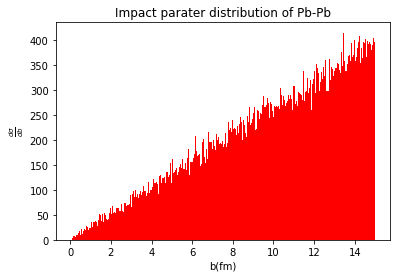

In [7]:
R = 15 
listb = []

for i in range(100000):
    b = R*np.sqrt(np.random.random())
    listb.append(b)

plt.hist(listb,bins = 500,color = 'red')
plt.xlabel('b(fm)')
plt.ylabel(r'$\frac{d\sigma}{db}$')
plt.title('Impact parater distribution of Pb-Pb')
plt.show()

In [11]:
for i in range(50):
    #loop through 50 times
    #Initialize
    #b>15
    sig = 42.*1/10. #mb converted to square fm
    d = np.sqrt(sig/np.pi)
    R = 15 
    b  = R * np.sqrt(np.random.random())
    if b >15 :
        continue 
    xA = rA*np.cos(phiA)*np.sin(thA)
    yA = rA*np.sin(phiA)*np.sin(thA)
    xB = rB*np.cos(phiB)*np.sin(thB)
    yB = rB*np.sin(phiB)*np.sin(thB)
    b  = R * np.sqrt(np.random.random())
    xA = xA - b/2
    xB = xB + b/2
    #Create the masks for identifying participating nucleons
    Apart = np.zeros(A,dtype=bool)
    Bpart = np.zeros(B,dtype=bool)
    for i in range(A):
        for j in range(B):
            if np.sqrt((xA[i]-xB[j])**2+(yA[i]-yB[j])**2) <= d:
                Apart[i] = True
                Bpart[j] = True

    maskA = Apart == True
    maskB = Bpart == True
    X = np.concatenate([xA[maskA],xB[maskB]])
    Y = np.concatenate([yA[maskA],yB[maskB]])
    meanX = np.mean(X)
    meanY = np.mean(Y)
    Yp = Y-meanY
    Xp = X-meanX
    Npart = len(X)
    if Npart == 0:
        continue
    
  #calculate r and phi in the new polar coordinate:
    rp= np.sqrt(Xp**2+Yp**2)
    phi=np.arctan2(Yp,Xp)
    #essentricity 
    e2_1 =  rp**2*np.cos(2*phi)
    e2_2 =  rp**2*np.sin(2*phi)
    e2_3 =  rp**2
    part1_e2_ave=np.mean(e2_1)
    part2_e2_ave=np.mean(e2_2)
    part3_e2_ave=np.mean(e2_3)
    e2   =  np.sqrt(part1_e2_ave**2+part2_e2_ave**2)/part3_e2_ave
    e2_ar = np.append(empty, e2)
 
    p1   =  rp**2*np.cos(3*phi)
    p2   =  rp**2*np.sin(3*phi)
    p3   =  rp**2
    part1_ave=np.mean(p1)
    part2_ave=np.mean(p2)
    part3_ave=np.mean(p3)
    e3   =  np.sqrt(part1_ave**2+part2_ave**2)/part3_ave
    print(e3)

Descirbe the shape :
What plot against what?
Size of the collision one vs centrality 
4-6 pages 

In [ ]:
Uncertainty: LHC uncertianties :

    fig = figure(1,(10,5))
    plt.subplot(1,2,1)
    plt.xlim(-18.,18.)
    plt.ylim(-18.,18.)
    plt.xlabel("x (fm)",fontsize=20)
    plt.ylabel("y (fm)",fontsize=20)
    plt.plot(xA,yA,"bo",markersize=10,alpha=0.2)
    plt.plot(xB,yB,"ro",markersize=10,alpha=0.2)
    #Participants
    plt.plot(xA[maskA],yA[maskA],"mo",markersize=10)
    plt.plot(xB[maskB],yB[maskB],"yo",markersize=10)
    plt.show()               

    

In [ ]:
sig = 42.*1/10. #mb converted to square fm
d = np.sqrt(sig/np.pi)

#print d

#Create the masks for identifying participating nucleons
Apart = np.zeros(A,dtype=bool)
Bpart = np.zeros(B,dtype=bool)
for i in range(A):
    for j in range(B):
        if np.sqrt((xA[i]-xB[j])**2+(yA[i]-yB[j])**2+(zA[i]-zB[j])**2) <= d:
            Apart[i] = True
            Bpart[j] = True

maskA = Apart == True
maskB = Bpart == True

fig = figure(1,(10,5))
plt.subplot(1,2,1)
plt.xlim(-18.,18.)
plt.ylim(-18.,18.)
plt.xlabel("x (fm)",fontsize=20)
plt.ylabel("y (fm)",fontsize=20)
plt.plot(xA,yA,"bo",markersize=10,alpha=0.2)
plt.plot(xB,yB,"ro",markersize=10,alpha=0.2)
#Participants
plt.plot(xA[maskA],yA[maskA],"mo",markersize=10)
plt.plot(xB[maskB],yB[maskB],"yo",markersize=10)

plt.subplot(1,2,2)
plt.xlim(-18.,18.)
plt.ylim(-18.,18.)
plt.xlabel("z (fm)",fontsize=20)
plt.ylabel("x (fm)",fontsize=20)
plt.arrow(-4,-b/2,5,0,head_width=1, head_length=1,fc='k', ec='k')
plt.arrow(4,b/2,-5,0,head_width=1, head_length=1,fc='k', ec='k')
plt.plot(zA-b,xA,"bo",markersize=10,alpha=0.2)
plt.plot(zB+b,xB,"ro",markersize=10,alpha=0.2)
#Participants
plt.plot(zA[maskA]-b,xA[maskA],"mo",markersize=10)
plt.plot(zB[maskB]+b,xB[maskB],"yo",markersize=10)

plt.show()               


In [ ]:
sig = 42.*1/10. #mb converted to square fm
d = np.sqrt(sig/np.pi)
Apart = np.zeros(A,dtype=bool)
Bpart = np.zeros(B,dtype=bool)
for j in range(len(b)):
    xA_ = rA*np.cos(phiA)*np.sin(thA)
    yA = rA*np.sin(phiA)*np.sin(thA)
    zA = rA*np.cos(thA)

    xB_ = rB*np.cos(phiB)*np.sin(thB)
    yB = rB*np.sin(phiB)*np.sin(thB)
    zB = rB*np.cos(thB)
    #Offset nucleons by our random impact parameter
    xA=xA_ - b[k]/2
    xB=xB_ + b[k]/2
    
for i in range(A):
    for j in range(B):
        if np.sqrt((xA[i]-xB[j])**2+(yA[i]-yB[j])**2+(zA[i]-zB[j])**2) <= d:
            Apart[i] = True
            Bpart[j] = True

    maskA = Apart == True
    maskB = Bpart == True


**(d)** Since we cannot measure the impact parameter directly for each collision, we need a method to estimate the geometric overlap so that we can categorize the collisions based on the number of nucleons participating in each collision and how many nucleon-nucleon collisions occurred.   Nucleons that pass close enough to each other will experience an inelastic collision that will rip the quarks right out of the nucleon.  The distance that dictates when an inelastic collision occurs is governed by the interaction cross-section, which has been measured very carefully at proton colliders.  The inelastic cross-section at collision energy of 200 GeV is $\sigma_{inel}$ = 42 mb (1 mb = 1 millibarn = 10$^{-24}$ cm$^2$ = 10$^{-31}$ m$^2$), defining an overlap area between two nucleons.  

Make an `interact` object for your two plots in part (c) that let's you vary the impact parameter from 0 to 18 fm.  On the plots, change the color of the nucleons that "participate" in interactions to something else. (Let the participating nucleons in nucleus A be one color and those in nucleus B be another color.) 

To do this, you’ll need to find all the nucleons from ion A that are within a distance, $D$, of a nucleon from ion B using $D = \sqrt{\sigma_{inel}/\pi}$, where $\sigma_{inel}$ is the cross sectional area measured in millibarns.  Don’t forget to convert the millibarns to fm$^{2}$.

In [ ]:
from IPython.html.widgets import interact, interactive

In [16]:
def Glauber(b=6.,A=6,B=6):

    nuc = np.array([12, 16, 27, 32, 40, 58, 63, 186, 197, 208, 238])
    lab = ['C','O','Al','S','Ca','Ni','Cu','W','Au','Pb','U']
    w = np.array([0,-0.051,0.,0.,-0.161,-0.1308,0.,0.,0.,0.,0.])
    R = np.array([2.47, 2.608, 3.07,3.458, 3.76, 4.309, 4.2, 6.51, 6.38, 6.68, 6.68])
    a = np.array([0.,0.513,0.519,0.61,0.586,0.516,0.596, 0.535, 0.535, 0.546, 0.6])

    rA = distribute1D(r,r**2*rho(r,w[A],a[A],R[A],nuc[A]),nuc[A])
    phiA = 2*np.pi*np.random.random_sample(nuc[A])
    thA = np.arccos(2*np.random.random_sample(nuc[A])-1.)

    
    rB = distribute1D(r,r**2*rho(r,w[B],a[B],R[B],nuc[B]),nuc[B])
    phiB = 2*np.pi*np.random.random_sample(nuc[B])
    thB = np.arccos(2*np.random.random_sample(nuc[B])-1.)
    
    xA = rA*np.cos(phiA)*np.sin(thA)
    yA = rA*np.sin(phiA)*np.sin(thA)
    zA = rA*np.cos(thA)

    xB = rB*np.cos(phiB)*np.sin(thB)
    yB = rB*np.sin(phiB)*np.sin(thB)
    zB = rB*np.cos(thB)

    #offset by impact parameter
    xA = xA - b/2
    xB = xB + b/2

    #Create the masks for identifying participating nucleons
    Apart = np.zeros(nuc[A],dtype=bool)
    Bpart = np.zeros(nuc[B],dtype=bool)
    for i in range(nuc[A]):
        for j in range(nuc[B]):
            if np.sqrt((xA[i]-xB[j])**2+(yA[i]-yB[j])**2+(zA[i]-zB[j])**2) <= d:
                Apart[i] = True
                Bpart[j] = True

    maskA = Apart == True
    maskB = Bpart == True

    fig = figure(1,(10,5))
    plt.subplot(1,2,1)
    plt.xlim(-18.,18.)
    plt.ylim(-18.,18.)
    plt.xlabel("x (fm)",fontsize=20)
    plt.ylabel("y (fm)",fontsize=20)
    plt.plot(xA,yA,"bo",markersize=10,alpha=0.2)
    plt.plot(xB,yB,"ro",markersize=10,alpha=0.2)
    #Participants
    plt.plot(xA[maskA],yA[maskA],"mo",markersize=10)
    plt.plot(xB[maskB],yB[maskB],"yo",markersize=10)
    plt.text(-15.,15.,"%s+%s"%(lab[A],lab[B]),fontsize=20)
    plt.text(-15.,12.,"b=%.2f"%b,fontsize=20)
    
    plt.subplot(1,2,2)
    plt.xlim(-18.,18.)
    plt.ylim(-18.,18.)
    plt.xlabel("z (fm)",fontsize=20)
    plt.ylabel("x (fm)",fontsize=20)
    plt.arrow(-4,-b/2,5,0,head_width=1, head_length=1,fc='k', ec='k')
    plt.arrow(4,b/2,-5,0,head_width=1, head_length=1,fc='k', ec='k')
    plt.plot(zA-10,xA,"bo",markersize=10,alpha=0.2)
    plt.plot(zB+10,xB,"ro",markersize=10,alpha=0.2)
    #Participants
    plt.plot(zA[maskA]-10,xA[maskA],"mo",markersize=10)
    plt.plot(zB[maskB]+10,xB[maskB],"yo",markersize=10)
    plt.text(-15.,15.,"%s+%s"%(lab[A],lab[B]),fontsize=20)
    plt.text(-15.,12.,"b=%.2f"%b,fontsize=20)
    
    plt.show()


v = interact(Glauber,b=(0.,18.,0.5),A=(0,10),B=(0,10))


NameError: name 'interact' is not defined

---
